# HW 3 Problem 2: Heavy vs. Light Tails

### Your Name Here

In [79]:
import numpy as np
from scipy import stats
from scipy.special import gamma
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt
import heapq

n = 10000 # Arbitrary plotting value for large n

## Part a: Law of Large Numbers

Make two plots of $S_n$ vs. $n$ for each of the distributions – the first plot over $n∈${1,2, . . . ,20} and the second one over the full range of $n$. **Interpret your plots, in light of the law of large numbers and write your analysis here.**

In [80]:
def make_graph_a(
    # Function to make our plots look nice
    xs,
    ys,
    distribution="Standard Normal",
    xlabel="Number of Variable Draws (n)",
    ylabel="Cumulative Sum"):
    """
    xs: List of x values to plot
    ys: List of y values to plot
    distribution: The name of the distribution that you are plotting
    """
    title = "{0} of {1} Distribution".format(ylabel, distribution)
    
    plt.subplots(1, 2, figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(xs[:20], ys[:20])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + " (First 20 values)")

    plt.subplot(1, 2, 2)
    plt.plot(xs, ys)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    

In [81]:
# Create n random draws of the desired distributions
# The np.random module is very useful for this!
normal_draws =  np.random.normal(1, 1, n)
weibull_draws = np.random.weibull(0.3, n)
pareto_draws = np.random.pareto(0.5, n) / 3

# Once you fill in the above variables, we can make the plots
# Instead of simulating for i=1...10^5 trials, take a partial sum
x_range = np.linspace(1, n, num=n)
normal_cumsum = np.cumsum(normal_draws)
weibull_cumsum  = np.cumsum(weibull_draws)
pareto_cumsum = np.cumsum(pareto_draws)

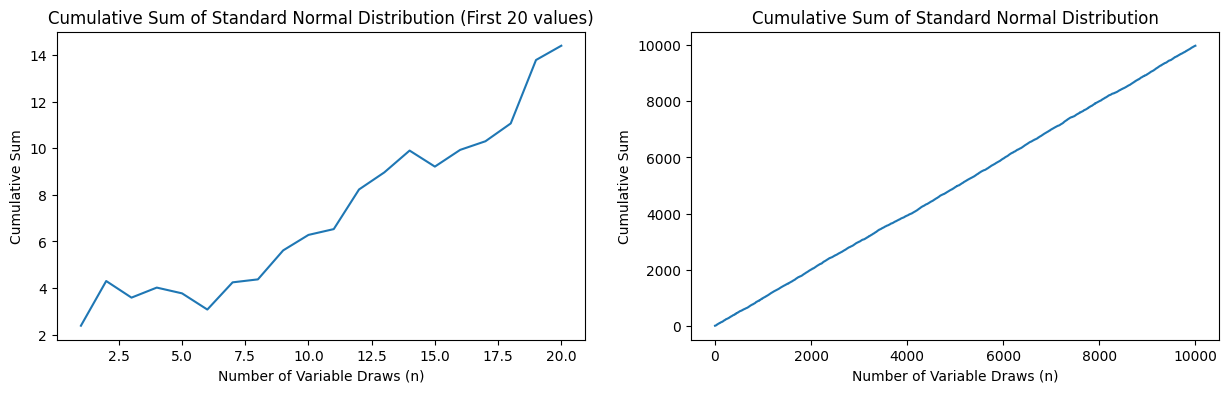

In [82]:
make_graph_a(
    x_range,
    normal_cumsum,
    distribution="Standard Normal")

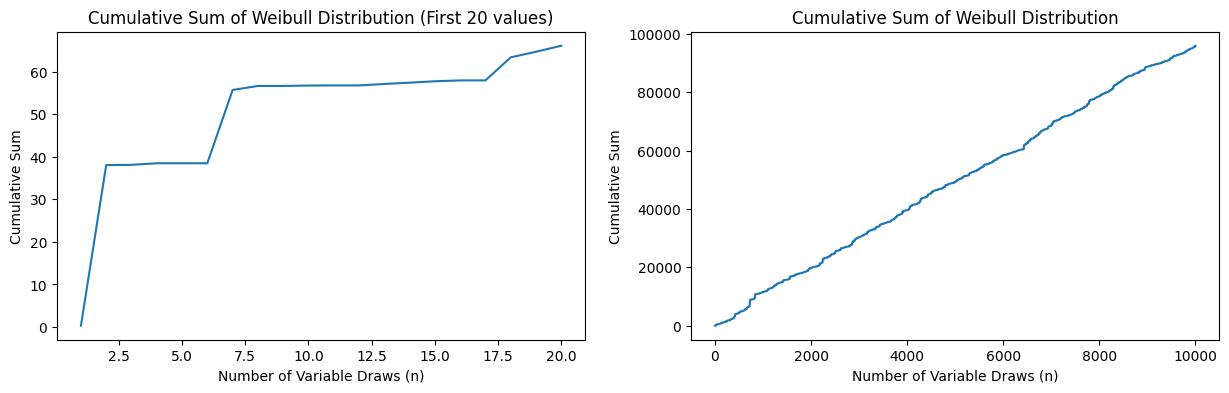

In [83]:
make_graph_a(
    x_range,
    weibull_cumsum,
    distribution="Weibull")

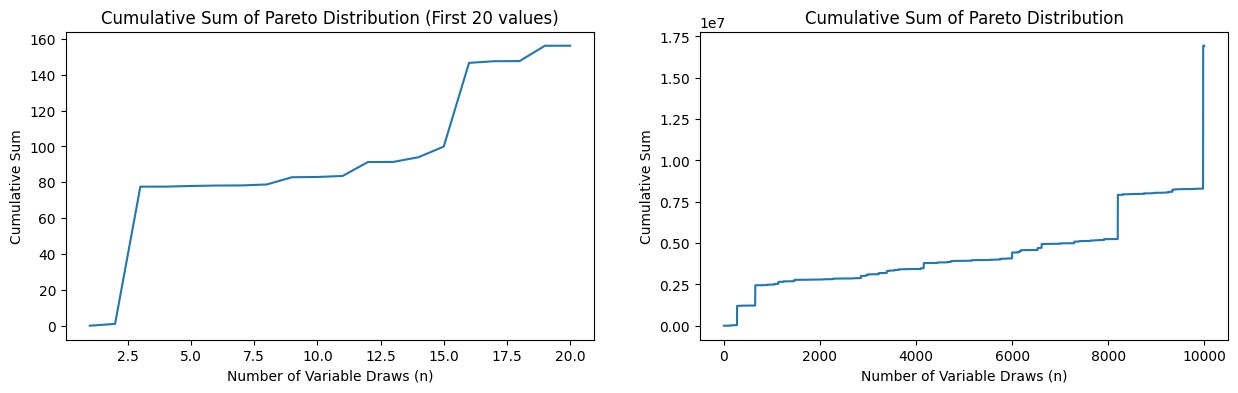

In [84]:
make_graph_a(
    x_range,
    pareto_cumsum,
    distribution="Pareto")

## Part b: Central Limit Theorem

The Central Limit Theorem tells us that deviations of $S_n$ from its mean are of size $\sqrt{n}$. That is, $S_n ≈ nE[X] + O(\sqrt{n})$. Plot $\frac{S_n − nE[X]}{\sqrt{n}}$ vs. $n$ for each of the distributions. **Interpret your plots, in light of the central limit theorem, and write your analysis here. Why aren't we also testing the Pareto distribution here?**

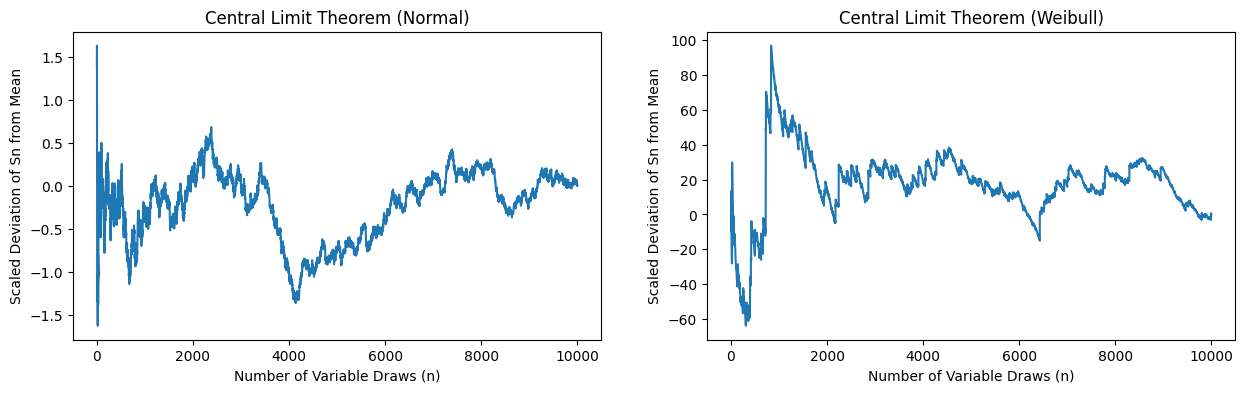

In [85]:
# Test the CLT by plotting the scaled deviation of Sn from its mean
# Why aren't we also testing the Pareto distribution here? 
# Use the cumulative sums and x_range from before
mean_normal = np.mean(normal_draws)
mean_weibull = np.mean(weibull_draws)

normal_clt = (np.cumsum(normal_draws) - np.arange(1, n + 1) * mean_normal) / np.sqrt(np.arange(1, n + 1))
weibull_clt = (np.cumsum(weibull_draws) - np.arange(1, n + 1) * mean_weibull) / np.sqrt(np.arange(1, n + 1))

# Once the above variables are defined, we can make our plots
plt.subplots(1, 2, figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(x_range, normal_clt)
plt.xlabel("Number of Variable Draws (n)")
plt.ylabel("Scaled Deviation of Sn from Mean")
plt.title("Central Limit Theorem (Normal)")

plt.subplot(1, 2, 2)
plt.plot(x_range, weibull_clt)
plt.xlabel("Number of Variable Draws (n)")
plt.ylabel("Scaled Deviation of Sn from Mean")
plt.title("Central Limit Theorem (Weibull)")
plt.show()

## Part c: The 80-20 rule

Vilfredo Pareto was motivated to define the Pareto distribution by this observation: 80% of the wealth in society is held by 20% of the population. This is an important distinguishing feature between heavy-tailed and light-tailed distributions. To observe this, suppose that your samples represent the incomes of 10000 individuals in a city. Since some of your samples for the Normal distribution might be negative, ignore the case of the Normal distribution for this part of the problem, since a negative income doesn’t make much sense. Compute the fraction $f(r)$ of the total income of the city held by the wealthiest $r$% of the population, for $r$ = 1,2,· · ·,20. For each of the distributions, plot $f(r)$ vs. $r$. (preferably both functions on a singleplot). **Interpret your plot(s) and write your analysis here**.

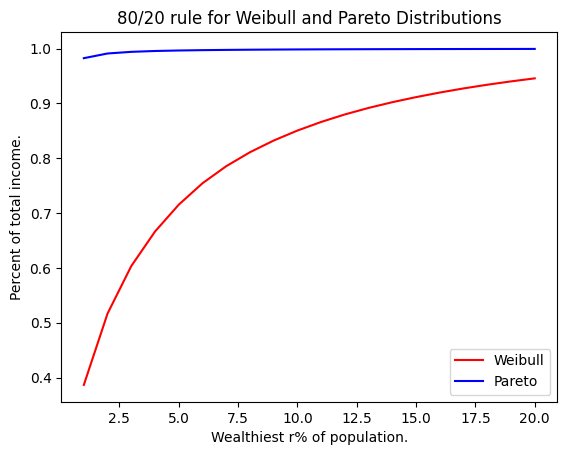

In [86]:
# For both the Weibull and Pareto distributions, create an array of 
# size 20, where entry r represents the fraction of f(r) (total income) 
# from the top r% of the population.

# Define the fraction of total income held by the wealthiest r% of the population function
def fraction_of_income(data, r):
    total_income = sum(data)
    sorted_data = sorted(data, reverse=True)
    top_income = sum(heapq.nlargest(int(len(data) * r / 100), sorted_data))
    return top_income / total_income

# Once the above lists are generated, we can make our plots
rRange = np.linspace(1, 20, num=20)

# Generate data for the distributions (e.g., weibull_draws, pareto_draws)
# Assuming data is already generated for both distributions
# Calculate the fraction of total income held by the wealthiest r% for both distributions
weibull_largest = [fraction_of_income(weibull_draws, r) for r in rRange]
pareto_largest = [fraction_of_income(pareto_draws, r) for r in rRange]

plt.plot(rRange, weibull_largest, 'r')
plt.plot(rRange, pareto_largest, 'b')
plt.xlabel("Wealthiest r% of population.")
plt.ylabel("Percent of total income.")
plt.title("80/20 rule for Weibull and Pareto Distributions")
plt.gca().legend(("Weibull", "Pareto"))
plt.show()

## Part d: Identifying Heavy Tails

For each of the distributions (i)–(iii), plot the frequencies and ranks of the 10000 samples on log-logscales, using separate plots for each distribution. Since we are using a log-log scale, filter out all negative and zero values before graphing. For the frequency plots, remember to experiment with various binsizes and to choose one such that the plots are useful. (Note that bins aren’t needed for the rank plot.) Then, use linear regression to fit a line through the points on each plot. Display the best-fit lines on theplots as well as the R-squared values. What do your plots tell you about identifying heavy tails basedon frequency and rank plots? **Interpret your plot(s) and write your analysis here**.

In [87]:
# Note: Feel free to modify this template as you wish or build your own from scratch.
# This is a tricky problem to implement so we hope we are helping by providing a template!

def pdf(data, dx=1):
    '''Takes an array with random samples from a distribution, 
    and creates an approximate PDF of points, to use when frequency
    Returns a tuple of two vectors x, y where 
    y_i = P(x_i - dx/2 <= data < x_i + dx/2)'''
  
    low, high = np.min(data), np.max(data)
    x, y = [], []
    
    for d in data:
        i = int((d + dx / 2 - low) / dx)
        xi = low + i * dx
        if xi in x:
            y[x.index(xi)] += 1
        else:
            x.append(xi)
            y.append(1)
    
    return np.array(x), np.array(y)
    
def ccdf(data):
    '''Takes an array with random samples from a 
    distribution, and creates an approximate CCDF 
    (complementary CDF) of points. Returns a tuple of 
    two vectors x, y where y_i = P(data > x_i)'''
    
    # Use this when creating the rank plot
    # HINT: To generate an approximate CDF (not CCDF), one would sort the random samples and 
    # return those as the x values, and then create a range from 1 to n
    # (scaled by 1/n) for the y values. How does this change when creating a CCDF?
    
    x = np.sort(data)
    y = 1 - np.arange(1, len(x) + 1) / len(x)
    return x, y

def keep_positive(data):
    '''Takes an array with random samples from
    a distribution, and filters our negative and 
    zero entries (in both x and y) in data'''  
    x, y = data 
    p = np.where(x > 0)
    x, y = x[p], y[p]
    p = np.where(y > 0)
    return x[p], y[p]
 
def non_outliers(x, m):
    '''Takes an array x of data and an integer m,
    and returns a list z of boolean values such 
    that z_i indicates whether the mean-centered 
    value x_i is within m std devs of the values in x'''
    return np.abs(x - np.mean(x)) <= m * np.std(x)
    
def reject_outliers(data, m):
    '''Takes an array of data (data here is a 
    tuple (x,y), where x and y are arrays: 
    in the form resulting from pdf() or ccdf(), for example)
    and an integer m, and removes outliers from the data'''
    
    # Note that since we are plotting on log-log scale
    # Removing outliers should happen AFTER we move to log-log scale
    
    # HINT: This function returns the (x, y) tuples in data that 
    # are not outliers (non_outliers() is helpful here)
    
    # HINT: You must set m to a default value that defines how many 
    # standard deviations away an outlier is. We are testing that 
    # these distributions are heavy-tailed, so too tight of a range 
    # won't be helpful.
    
    x, y = data
    i = non_outliers(np.log(x), m)
    return x[i], y[i]
    
def linear_regression(X, y):
    '''Takes (one-dimensional) training data X 
    and labels y and fits the simple linear regression 
    model y = mX + b, and computes the coefficient 
    of determination (r^2). Returns a tuple (m, b, r^2)'''
    
    model = linear_model.LinearRegression() 
    model.fit(np.reshape(X, (-1, 1)), y)

    m = model.coef_[0]
    b = model.intercept_
    y_pred = model.predict(np.reshape(X, (-1, 1)))
    r2 = metrics.r2_score(y, y_pred)
    return m, b, r2

def make_graphs_d(data, title, labels, ylabel='', xlabel=''):
    """
    Build respective PDF/CCDF for all three distributions
    Attempts to create a best-fit line
    And plots this line alongside the points
    data: List of pdf() outputs from all 3 distributions
    title: Either 
        Frequency plot (PDF)
        Rank plot (CCDF)
    labels: List of distribution names
        i.e. ["Normal, Weibull, Pareto"]
    """
    # General plotting function for points, as well as best-fit line
    
    for (X, y), label in zip(data, labels):
        m, b, r2 = linear_regression(X, y)
        plt.scatter(X, y, label=label, s=1)
        plt.plot(X, b + m * X, label='y = %.2f * x + %.2f, r2 = %.3f' % (m, b, r2))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.show()

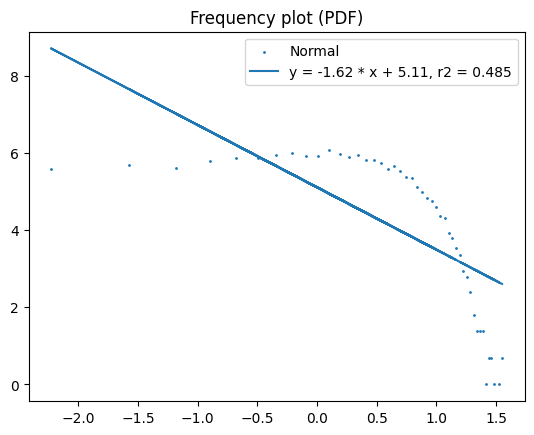

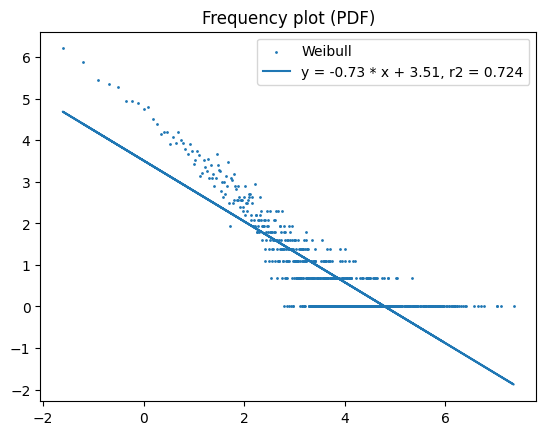

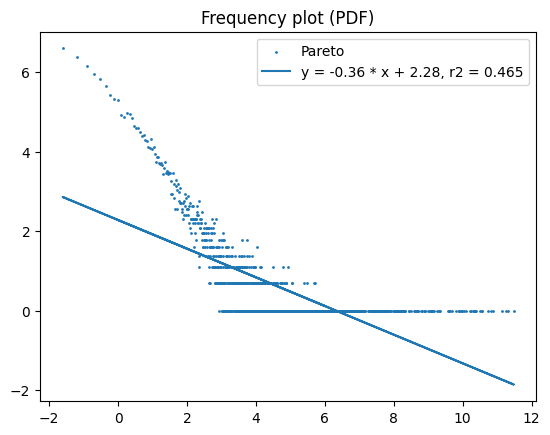

In [88]:
# Concatenate data into one list to reduce code repetition
Xi = [normal_draws, weibull_draws, pareto_draws]
names = ["Normal", "Weibull", "Pareto"]

# Build the PDF and turn it into a log-log scale,
# first removing all negative values and corresponding indices
# Before or after we convert to log-scale?
m = 3

data = [pdf(Xi[i], dx=0.1) for i in range(3)]
data = [keep_positive(d) for d in data]
data = [reject_outliers(d, m) for d in data]
data = [(np.log(X), np.log(y)) for (X, y) in data]

# Plot the frequencies
make_graphs_d(data, 'Frequency plot (PDF)', names)

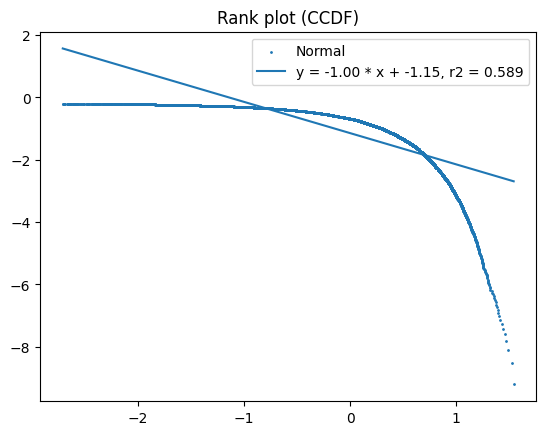

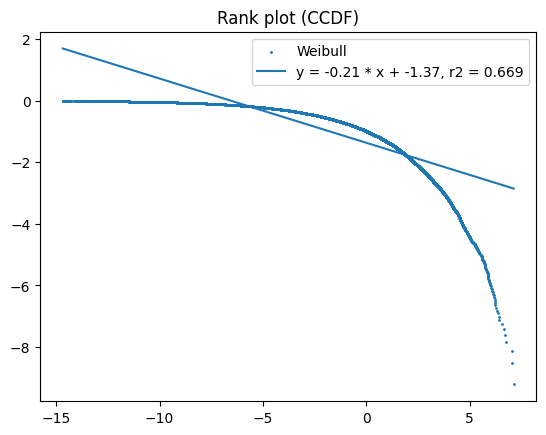

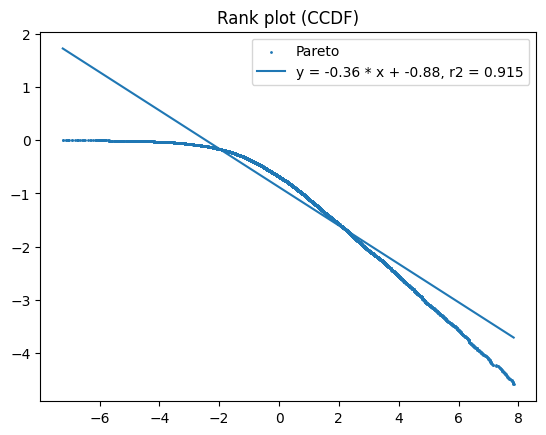

In [89]:
data = [ccdf(Xi[i]) for i in range(3)]

# Build the CCDF and turn it into a log-log scale,
# first removing all negative values and corresponding indices
data = [keep_positive(d) for d in data]
data = [reject_outliers(d, 3) for d in data]
data = [(np.log(X), np.log(y)) for (X, y) in data]

# Plot the ranks
make_graphs_d(data, 'Rank plot (CCDF)', names)